## <u>FDA Risky Inspection Prediction and Facility Risk Ranking</u>

US-FDA inspects around 14000 facilities each financial year. Operational wise it is a nightmare to compile the inspection schedule for inspectors. This becomes more problematic for cities like Los Angeles, Miami, etc. which have high concentrations of such facilities. There is also a possibility of missing out on some high-risk facilities for inspection.

Using data analysis and machine learning we can calculate the risk associated with each facility and subsequently rank them based on the risk. Also, given the inspection plan, we can predict if the facilities to be evaluated are in severe violation of the applicable laws and regulations and if official action needs to be taken.

Authorities will do better inspection/operation planning in a financial year. Ranking of facilities will help to streamline the inspection schedule, reducing operation costs. Also, it will ensure that all high-risk facilities are inspected first.

Data Source :- https://datadashboard.fda.gov/ora/cd/inspections.htm

<b>Ranking</b>

Risk means what is the likelihood of official action for inspection by state, city, product type, etc considering factors like the number of inspections conducted, number of FEI, etc. We then rank the FEI by the risk factor. The below chart shows the methodology of calculation of risk at various levels and the calculation of rank from the risk.


<b>Risk calculation at product level</b>
	Risk at product type is calculated using count of inspections resulting in official action, number of FEI, number of inspections cities, state, project type, legal name aggregated by product

<b>Risk calculation at state level</b>
	Risk at product type is calculated using count of inspections resulting in official action, number of FEI, number of inspections, cities, legal name aggregated by state

<b>Risk calculation at city level</b>
	Risk at product type is calculated using count of inspections resulting in official action, number of FEI, number of inspections, legal name aggregated by city

<b>Risk calculation at organizational level</b>
	Risk at product type is calculated using count of inspections resulting in official action, number of FEI, number of inspections aggregated by legal name

<b>Risk calculation at FEI level</b>
	Risk at product type is calculated using count of inspections resulting in official action number of inspections aggregated by FEI
    
<b>Final Risk Calculation</b>

Final risk of FEI is calculated by first calculating the weights of each level and then calculating the weighted average of the risks of different levels. For example risk_at_FEI = weight1*risk_at_product_level +weight2*risk_at_city_level + weight3*risk_at_state_level…….

After the final risk calculation, the rank of each FEI is calculated(the higher the risk, the higher the ranking)

Finally percentile is calculated from the rank


<b>Classification</b>

<b>Objective of classification</b> To build a predictive model to identify inspection that will result in official action given the legal name, time, place and project area of the inspection. This predictive model is applicable once the inspection plan is laid out for a given financial year.

<b>Feature selection</b> Created multiple features based on recency & frequency of official action, risk factors, inspection citation, etc. The most important features are selected to build the final model.

<b>Imbalanced classification</b> The data set was suffering from an imbalanced classification problem meaning inspection resulting in official action is very low compared to other inspection result types. We used SMOTE oversampling technique and threshold moving to address this imbalanced classification issue.

<b>Testing different machine learning model</b> We used both tree-based and linear models for training. Tree-based model included xgboost, balancedregressortreeclassifier, light gradient boosting, ada boost, extra tree classifier, etc. Linear models included logistic regression, LDA, naive bayes etc.

<b>Tuning of model and selection of top model</b> BalancedRegressorTreeClassifier was chosen as the final model based on its recall and F1 score. Tuning of the model is done to further improve recall and F1 score

Final prediction on test dataset Finally, the tuned model is applied to the test data set and the result is analyzed


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from pycaret.classification import *

C:\Users\ghoshr\Desktop\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ghoshr\Desktop\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
C:\Users\ghoshr\Desktop\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


1) Target Encoding</br>
2) Imbalance Classification</br>
3) Dividing data into test and train</br>
4) Model Evaluation</br>
5) Stacked Model</br>
6) Probaility calculation</br>
7) Risk Analysis</br>

In [2]:
##Target Encoding

In [3]:
master_data_df = pd.read_excel("Target Encoding.xlsx",sheet_name="Sheet1",engine='openpyxl')

In [4]:
master_data_df['FEI Number'] = master_data_df["FEI Number"].astype(str)
master_data_df["Inspection ID"] = master_data_df["Inspection ID"].astype(str)

<b>Ranking By Balanced Logistic Regrssion</b>

In [5]:
##FEI
temp_FEI = master_data_df.groupby(["FEI Number"],as_index=False).agg(count_of_OAI = ('Category OAI','sum'),count_of_Inspection=('Inspection ID','nunique'))
temp_FEI['Risk_Factor_FEI'] = (temp_FEI['count_of_OAI']/temp_FEI['count_of_Inspection'])*np.log(temp_FEI['count_of_Inspection'])
temp_FEI.sort_values(by="Risk_Factor_FEI",ascending=False)
temp_FEI = temp_FEI[["FEI Number","Risk_Factor_FEI"]]
temp_FEI.head(2)

,FEI Number,Risk_Factor_FEI
0,1000014971.0,0.0
1,1000015879.0,0.0


In [6]:
##Legal Name
temp_ln = master_data_df.groupby(["Legal Name"],as_index=False).agg(count_of_OAI = ('Category OAI','sum'),count_of_Inspection=('Inspection ID','nunique'))
temp_ln['Risk_Factor_Legal_Name'] = (temp_ln['count_of_OAI']/temp_ln['count_of_Inspection'])*np.log(temp_ln['count_of_Inspection'])
temp_ln.sort_values(by="Risk_Factor_Legal_Name",ascending=False)
temp_ln = temp_ln[["Legal Name","Risk_Factor_Legal_Name"]]
temp_ln.head(2)

,Legal Name,Risk_Factor_Legal_Name
0,.Decimal LLC,0.0
1,1000 Islands Fisheries,0.0


In [7]:
##City
temp_City = master_data_df.groupby(["City"],as_index=False).agg(count_of_OAI = ('Category OAI','sum'),count_of_Inspection=('Inspection ID','nunique'))
temp_City['Risk_Factor_Legal_Name'] = (temp_City['count_of_OAI']/temp_City['count_of_Inspection'])*np.log(temp_City['count_of_Inspection'])
temp_City.sort_values(by="Risk_Factor_Legal_Name",ascending=False)
temp_City = temp_City[["City","Risk_Factor_Legal_Name"]]
temp_City.columns = ["City","Risk_Factor_City"]
temp_City.head(2)

,City,Risk_Factor_City
0,Abbeville,0.0
1,Abbott Park,0.0


In [8]:
##State
temp_State = master_data_df.groupby(["State"],as_index=False).agg(count_of_OAI = ('Category OAI','sum'),count_of_Inspection=('Inspection ID','nunique'))
temp_State['Risk_Factor_Legal_Name'] = (temp_State['count_of_OAI']/temp_State['count_of_Inspection'])*np.log(temp_State['count_of_Inspection'])
temp_State.sort_values(by="Risk_Factor_Legal_Name",ascending=False)
temp_State = temp_State[["State","Risk_Factor_Legal_Name"]]
temp_State.columns = ["State","Risk_Factor_State"]
temp_State.head(2)

,State,Risk_Factor_State
0,Alabama,1.338175
1,Alaska,0.053637


In [9]:
##Project Area
temp_Project_Area = master_data_df.groupby(["Project Area"],as_index=False).agg(count_of_OAI = ('Category OAI','sum'),count_of_Inspection=('Inspection ID','nunique'))
temp_Project_Area['Risk_Factor_Legal_Name'] = (temp_Project_Area['count_of_OAI']/temp_Project_Area['count_of_Inspection'])*np.log(temp_Project_Area['count_of_Inspection'])
temp_Project_Area.sort_values(by="Risk_Factor_Legal_Name",ascending=False)
temp_Project_Area = temp_Project_Area[["Project Area","Risk_Factor_Legal_Name"]]
temp_Project_Area.columns = ["Project Area","Risk_Factor_Project Area"]
temp_Project_Area.head(2)

,Project Area,Risk_Factor_Project Area
0,Bioresearch Monitoring,0.785710
1,Blood and Blood Products,0.187742


In [10]:
##Product Type
temp_Product_Type = master_data_df.groupby(["Product Type"],as_index=False).agg(count_of_OAI = ('Category OAI','sum'),count_of_Inspection=('Inspection ID','nunique'))
temp_Product_Type['Risk_Factor_Legal_Name'] = (temp_Product_Type['count_of_OAI']/temp_Product_Type['count_of_Inspection'])*np.log(temp_Product_Type['count_of_Inspection'])
temp_Product_Type.sort_values(by="Risk_Factor_Legal_Name",ascending=False)
temp_Product_Type = temp_Product_Type[["Product Type","Risk_Factor_Legal_Name"]]
temp_Product_Type.columns = ["Product Type","Risk_Factor_Product_Type"]
temp_Product_Type.head(2)

,Product Type,Risk_Factor_Product_Type
0,Biologics,0.403594
1,Devices,1.502583


<b>Master File Creation</b>

In [11]:
master_data_main_df = pd.read_excel("Master File Evaluation.xlsx",sheet_name="Master Sheet",engine='openpyxl')

In [12]:
master_data_main_df['FEI Number'] = master_data_main_df["FEI Number"].astype(str)
master_data_main_df["Inspection ID"] = master_data_main_df["Inspection ID"].astype(str)

In [13]:
master_data_main_df = master_data_main_df.merge(temp_FEI,left_on="FEI Number",right_on="FEI Number",how="left")
master_data_main_df["Risk_Factor_FEI"].fillna(0,inplace=True)

In [14]:
master_data_main_df = master_data_main_df.merge(temp_ln,left_on="Legal Name",right_on="Legal Name",how="left")
master_data_main_df["Risk_Factor_Legal_Name"].fillna(0,inplace=True)

In [15]:
master_data_main_df = master_data_main_df.merge(temp_City,left_on="City",right_on="City",how="left")
master_data_main_df["Risk_Factor_City"].fillna(0,inplace=True)

In [16]:
master_data_main_df = master_data_main_df.merge(temp_State,left_on="State",right_on="State",how="left")
master_data_main_df["Risk_Factor_State"].fillna(0,inplace=True)

In [17]:
master_data_main_df = master_data_main_df.merge(temp_Project_Area,left_on="Project Area",right_on="Project Area",how="left")
master_data_main_df["Risk_Factor_Project Area"].fillna(0,inplace=True)

In [18]:
master_data_main_df = master_data_main_df.merge(temp_Product_Type,left_on="Product Type",right_on="Product Type",how="left")
master_data_main_df["Risk_Factor_Product_Type"].fillna(0,inplace=True)

In [22]:
master_data_main_df.columns
master_data_main_imbalced_class_df = master_data_main_df[["FEI Number",'Legal Name', 'City',
       'State','Inspection ID','Inspection End Date','Month', 'Quarter','Category OAI','Project Area', 'Product Type', 'Risk_Factor_FEI',
       'Risk_Factor_Legal_Name', 'Risk_Factor_City', 'Risk_Factor_State',
       'Risk_Factor_Project Area', 'Risk_Factor_Product_Type']]
master_data_main_imbalced_class_df.head(2)

,FEI Number,Legal Name,City,State,Inspection ID,Inspection End Date,Month,Quarter,Category OAI,Project Area,Product Type,Risk_Factor_FEI,Risk_Factor_Legal_Name,Risk_Factor_City,Risk_Factor_State,Risk_Factor_Project Area,Risk_Factor_Product_Type
0,3007516078,"24/7 Seafood Distributor, Corp.",Miami,Florida,1173724,2022-07-06,7,3,0,Foodborne Biological Hazards,Food/Cosmetics,0.0,0.346574,0.918632,1.481191,0.88574,1.164926
1,3013338718,Pacific Golden Coast Trading Inc,Hermosa Beach,California,1172912,2022-07-01,7,3,0,Foodborne Biological Hazards,Food/Cosmetics,0.0,0.000000,0.000000,1.186878,0.88574,1.164926


In [23]:
master_data_main_imbalced_class_df['Inspection End Date'] = pd.to_datetime(master_data_main_imbalced_class_df['Inspection End Date'])
train_df = master_data_main_imbalced_class_df[master_data_main_imbalced_class_df['Inspection End Date']<'2021-07-01']
test_df = master_data_main_imbalced_class_df[master_data_main_imbalced_class_df['Inspection End Date']>'2021-06-30']

X_train = train_df[['Risk_Factor_FEI',
       'Risk_Factor_Legal_Name', 'Risk_Factor_City', 'Risk_Factor_State','Risk_Factor_Product_Type']]
y_train = train_df['Category OAI']
X_test = test_df[['Risk_Factor_FEI',
       'Risk_Factor_Legal_Name', 'Risk_Factor_City', 'Risk_Factor_State','Risk_Factor_Product_Type']]
y_test = test_df['Category OAI']
col_name_feature = X_train.columns
class_name = "Category OAI"

In [24]:
test_df.columns

Index(['FEI Number', 'Legal Name', 'City', 'State', 'Inspection ID',
       'Inspection End Date', 'Month', 'Quarter', 'Category OAI',
       'Project Area', 'Product Type', 'Risk_Factor_FEI',
       'Risk_Factor_Legal_Name', 'Risk_Factor_City', 'Risk_Factor_State',
       'Risk_Factor_Project Area', 'Risk_Factor_Product_Type'],
      dtype='object')

<b>Balanced Logistic Regression</b>

In [25]:
w = {0:1, 1:99}
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

LM_model = LogisticRegression(random_state=13, class_weight=w)
# parameter grid
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear','softmax'],
}

LM_model = GridSearchCV(estimator=LM_model,param_grid=parameters,cv=5,scoring='recall')
LM_model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight={0: 1, 1: 99},
                                          random_state=13),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear',
                                    'softmax']},
             scoring='recall')

In [26]:
LM_model = LogisticRegression(C=1.0, class_weight={0: 1, 1: 99},
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=13, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False)
LM_model.fit(X_train,y_train)
print(LM_model.coef_, LM_model.intercept_)
print(X_train.columns)

[[0.         4.36750923 1.44265397 0.17164559 1.2019545 ]] [-1.09613133]
Index(['Risk_Factor_FEI', 'Risk_Factor_Legal_Name', 'Risk_Factor_City',
       'Risk_Factor_State', 'Risk_Factor_Product_Type'],
      dtype='object')


In [27]:
dic = pd.DataFrame(columns=['Features','Weights'])
dic['Features'] = X_train.columns
dic['Weights'] = LM_model.coef_[0]

In [28]:
FEI = dic[dic['Features']=="Risk_Factor_FEI"]["Weights"].values
LN = dic[dic['Features']=="Risk_Factor_Legal_Name"]["Weights"].values
city = dic[dic['Features']=="Risk_Factor_City"]["Weights"].values
state = dic[dic['Features']=="Risk_Factor_State"]["Weights"].values
product = dic[dic['Features']=="Risk_Factor_Product_Type"]["Weights"].values

In [29]:
train_df['Risk_Factor'] = train_df['Risk_Factor_FEI']*FEI+train_df['Risk_Factor_Legal_Name']*LN+train_df['Risk_Factor_City']*city+train_df['Risk_Factor_State']*state+train_df['Risk_Factor_Product_Type']*product

In [30]:
train_df = train_df.sort_values(by="Risk_Factor",ascending=False)
train_risk_df = train_df[['FEI Number','Risk_Factor']]

In [43]:
test_df_x = test_df[["FEI Number","Legal Name",'City', 'State','Category OAI', 'Product Type']]
test_df_x = test_df_x.drop_duplicates()
test_analysis_df = test_df_x.merge(train_risk_df,how="left",left_on="FEI Number",right_on="FEI Number")
test_analysis_df = test_analysis_df.drop_duplicates()

In [44]:
test_analysis_df = test_analysis_df[~test_analysis_df.Risk_Factor.isna()]

<b><u>Post Risk Analysis</u></b>

In [45]:
test_analysis_df = test_analysis_df.sort_values(by="Risk_Factor",ascending=False)
test_analysis_df['Risk'] = test_analysis_df['Risk_Factor'].rank(ascending=False)
test_analysis_df['Percentile Rank'] = test_analysis_df['Risk'].rank(pct = True)*100

In [46]:
def percentile_cat(x):
    if x <10:
        return 0.1
    elif x < 20:
        return 0.2
    elif x <30:
        return 0.3
    elif x < 40:
        return 0.4
    elif x < 50:
        return 0.5
    elif x < 60:
        return 0.6
    elif x < 70:
        return 0.7
    elif x < 80:
        return 0.8
    elif x < 90:
        return 0.9
    else:
        return 1
    
test_analysis_df['Percentile Cat'] = test_analysis_df['Percentile Rank'].apply(lambda x :percentile_cat(x))

In [47]:
final_analysis_df = test_analysis_df.groupby("Percentile Cat",as_index=False).agg(count_of_OAI = ('Category OAI','sum'),count_of_FEI = ('FEI Number','nunique'))
final_analysis_df.head(10)
final_analysis_df["%violaion found"] = (final_analysis_df['count_of_OAI']/final_analysis_df['count_of_FEI'])*100

In [48]:
final_analysis_df.head(10)

,Percentile Cat,count_of_OAI,count_of_FEI,%violaion found
0,0.1,20,112,17.857143
1,0.2,22,125,17.600000
2,0.3,15,137,10.948905
3,0.4,15,137,10.948905
4,0.5,20,137,14.598540
5,0.6,11,137,8.029197
6,0.7,12,140,8.571429
7,0.8,11,136,8.088235
8,0.9,12,144,8.333333
9,1.0,5,138,3.623188


<b>Ranking By WoE and Information Value</b>

In [49]:
master_data_main_imbalced_class_df['Inspection End Date'] = pd.to_datetime(master_data_main_imbalced_class_df['Inspection End Date'])
train_df = master_data_main_imbalced_class_df[master_data_main_imbalced_class_df['Inspection End Date']<'2021-07-01']
test_df = master_data_main_imbalced_class_df[master_data_main_imbalced_class_df['Inspection End Date']>'2021-06-30']

X_train = train_df[['Risk_Factor_FEI',
       'Risk_Factor_Legal_Name', 'Risk_Factor_City', 'Risk_Factor_State','Risk_Factor_Product_Type']]
y_train = train_df['Category OAI']
X_test = test_df[['Risk_Factor_FEI',
       'Risk_Factor_Legal_Name', 'Risk_Factor_City', 'Risk_Factor_State','Risk_Factor_Product_Type']]
y_test = test_df['Category OAI']
col_name_feature = X_train.columns
class_name = "Category OAI"

In [50]:
train_woe_iv_df = train_df[['FEI Number', 'Legal Name', 'City', 'State', 'Inspection ID',
       'Inspection End Date', 'Month', 'Quarter', 'Category OAI',
       'Project Area', 'Product Type']]
train_woe_iv_df = train_woe_iv_df.drop_duplicates()

total_0 = train_woe_iv_df[train_woe_iv_df['Category OAI']==0]['Inspection ID'].count()
total_1 = train_woe_iv_df[train_woe_iv_df['Category OAI']==1]['Inspection ID'].count()

In [51]:
def woe_iv(x):
    dic = {}
    count_of_1 = x[x['Category OAI']==1]['Inspection ID'].count()
    list_insp = list(x[x['Category OAI']==1]['Inspection ID'])
    count_of_0 = x[~x['Inspection ID'].isin(list_insp)]['Inspection ID'].count()
    total = count_of_1+count_of_0
    per_count_of_1 = count_of_1/total_1*100
    per_count_of_0 = count_of_0/total_0*100
    woe = np.log(per_count_of_1/per_count_of_0)
    iv = (per_count_of_0 - per_count_of_1)*woe
    dic['woe'] = woe
    dic['iv'] = iv
    #print("end")
    return pd.Series(dic,index=['woe','iv'])

state_df = train_woe_iv_df.groupby('State',as_index=False).apply(woe_iv)
state_df.replace([np.inf, -np.inf], 0, inplace=True)

In [52]:
legal_df = train_woe_iv_df.groupby('Legal Name',as_index=False).apply(woe_iv)
legal_df.replace([np.inf, -np.inf], 0, inplace=True)
city_df = train_woe_iv_df.groupby('City',as_index=False).apply(woe_iv)
city_df.replace([np.inf, -np.inf], 0, inplace=True)
fei_df = train_woe_iv_df.groupby('FEI Number',as_index=False).apply(woe_iv)
fei_df.replace([np.inf, -np.inf], 0, inplace=True)
product_df = train_woe_iv_df.groupby('Product Type',as_index=False).apply(woe_iv)
product_df.replace([np.inf, -np.inf], 0, inplace=True)

In [53]:
state_iv = state_df['iv'].sum().astype(int)
print(state_iv)
legal_iv = legal_df['iv'].sum().astype(int)
print(legal_iv)
city_iv = city_df['iv'].sum().astype(int)
print(city_iv)
fei_iv = fei_df['iv'].sum().astype(int)
print(fei_iv)
product_iv = product_df['iv'].sum().astype(int)
print(product_iv)

-9
-103
-57
-103
-9


In [54]:
final_df = train_woe_iv_df.merge(state_df,how="left",left_on="State",right_on="State")
final_df.rename(columns = {'woe':'woe_state','iv':'iv_state'},inplace=True)

final_df = final_df.merge(legal_df,how="left",left_on="Legal Name",right_on="Legal Name")
final_df.rename(columns = {'woe':'woe_legal','iv':'iv_legal'},inplace=True)

final_df = final_df.merge(city_df,how="left",left_on="City",right_on="City")
final_df.rename(columns = {'woe':'woe_city','iv':'iv_city'},inplace=True)

final_df = final_df.merge(fei_df,how="left",left_on="FEI Number",right_on="FEI Number")
final_df.rename(columns = {'woe':'woe_fei','iv':'iv_fei'},inplace=True)

final_df = final_df.merge(product_df,how="left",left_on="Product Type",right_on="Product Type")
final_df.rename(columns = {'woe':'woe_product','iv':'iv_product'},inplace=True)

In [55]:
def rank_calc(a,b,c,d,e):
    print(type(a),type(state_iv))
    risk = a*state_iv+b*legal_iv+c*city_iv+d*fei_iv+e*product_iv
    return risk

In [56]:
final_df['risk_calc'] = final_df['woe_state']*state_iv+final_df['woe_legal']*legal_iv+final_df['woe_city']*city_iv+final_df['woe_fei']*fei_iv+final_df['woe_product']*product_iv

In [57]:
final_df=final_df[['FEI Number','risk_calc']]

In [58]:
test_df_risk = test_df[["FEI Number","Legal Name",'City', 'State','Category OAI', 'Product Type']]
test_df_risk = test_df_risk.merge(final_df,how="left",left_on="FEI Number",right_on="FEI Number")
test_df_risk = test_df_risk.drop_duplicates()

In [59]:
test_df_risk = test_df_risk.sort_values(by="risk_calc",ascending=False)

In [60]:
test_df_risk = test_df_risk.sort_values(by="risk_calc",ascending=False)
test_df_risk['Risk'] = test_df_risk['risk_calc'].rank(ascending=False)
test_df_risk['Percentile Rank'] = test_df_risk['Risk'].rank(pct = True)*100
def percentile_cat(x):
    if x <10:
        return 0.1
    elif x < 20:
        return 0.2
    elif x <30:
        return 0.3
    elif x < 40:
        return 0.4
    elif x < 50:
        return 0.5
    elif x < 60:
        return 0.6
    elif x < 70:
        return 0.7
    elif x < 80:
        return 0.8
    elif x < 90:
        return 0.9
    else:
        return 1
    
test_df_risk['Percentile Cat'] = test_df_risk['Percentile Rank'].apply(lambda x :percentile_cat(x))

In [61]:
test_df_risk.head(2)

,FEI Number,Legal Name,City,State,Category OAI,Product Type,risk_calc,Risk,Percentile Rank,Percentile Cat
225,3004070098,"Airgas USA, LLC",Fort Collins,Colorado,0,Drugs,204.428598,1.0,0.070028,0.1
181,1217333,"Airgas USA, LLC",Billerica,Massachusetts,0,Drugs,180.842169,2.0,0.140056,0.1


In [62]:
final_analysis_df = test_df_risk.groupby("Percentile Cat",as_index=False).agg(count_of_OAI = ('Category OAI','sum'),count_of_FEI = ('FEI Number','nunique'))
final_analysis_df.head(10)
final_analysis_df["%violaion found"] = (final_analysis_df['count_of_OAI']/final_analysis_df['count_of_FEI'])*100
final_analysis_df.head(10)

,Percentile Cat,count_of_OAI,count_of_FEI,%violaion found
0,0.1,11,131,8.396947
1,0.2,9,129,6.976744
2,0.3,13,139,9.352518
3,0.4,4,141,2.836879
4,0.5,14,137,10.218978
5,0.6,19,137,13.868613
6,0.7,17,140,12.142857
7,0.8,17,134,12.686567
8,0.9,20,122,16.393443
9,1.0,82,1425,5.754386


<b>Imbalance Classification</b>

In [63]:
master_data_main_imbalced_class_df = master_data_main_df[["FEI Number",'Legal Name', 'City',
       'State','Inspection ID','Inspection End Date','Month', 'Quarter','Category OAI','Project Area', 'Product Type', 'Risk_Factor_FEI',
       'Risk_Factor_Legal_Name', 'Risk_Factor_City', 'Risk_Factor_State',
       'Risk_Factor_Project Area', 'Risk_Factor_Product_Type']]
master_data_main_imbalced_class_df.head(2)

,FEI Number,Legal Name,City,State,Inspection ID,Inspection End Date,Month,Quarter,Category OAI,Project Area,Product Type,Risk_Factor_FEI,Risk_Factor_Legal_Name,Risk_Factor_City,Risk_Factor_State,Risk_Factor_Project Area,Risk_Factor_Product_Type
0,3007516078,"24/7 Seafood Distributor, Corp.",Miami,Florida,1173724,2022-07-06,7,3,0,Foodborne Biological Hazards,Food/Cosmetics,0.0,0.346574,0.918632,1.481191,0.88574,1.164926
1,3013338718,Pacific Golden Coast Trading Inc,Hermosa Beach,California,1172912,2022-07-01,7,3,0,Foodborne Biological Hazards,Food/Cosmetics,0.0,0.000000,0.000000,1.186878,0.88574,1.164926


In [64]:
master_data_main_imbalced_class_df['Inspection End Date'] = pd.to_datetime(master_data_main_imbalced_class_df['Inspection End Date'])
train_df = master_data_main_imbalced_class_df[master_data_main_imbalced_class_df['Inspection End Date']<'2021-07-01']
test_df = master_data_main_imbalced_class_df[master_data_main_imbalced_class_df['Inspection End Date']>'2021-06-30']

In [65]:
X_train = train_df[['Risk_Factor_FEI','Month', 'Quarter',
       'Risk_Factor_Legal_Name', 'Risk_Factor_City', 'Risk_Factor_State',
       'Risk_Factor_Project Area', 'Risk_Factor_Product_Type']]
y_train = train_df['Category OAI']
X_test = test_df[['Risk_Factor_FEI','Month', 'Quarter',
       'Risk_Factor_Legal_Name', 'Risk_Factor_City', 'Risk_Factor_State',
       'Risk_Factor_Project Area', 'Risk_Factor_Product_Type']]
y_test = test_df['Category OAI']
col_name_feature = X_train.columns
class_name = "Category OAI"

In [66]:
##Imbalance classification Mapping
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
counter = Counter(y_train)
print(counter)
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X, y = pipeline.fit_resample(X_train, y_train)
counter = Counter(y)
print(counter)

Counter({0: 56686, 1: 6429})
Counter({0: 56686, 1: 28343})


In [67]:
X.columns

Index(['Risk_Factor_FEI', 'Month', 'Quarter', 'Risk_Factor_Legal_Name',
       'Risk_Factor_City', 'Risk_Factor_State', 'Risk_Factor_Project Area',
       'Risk_Factor_Product_Type'],
      dtype='object')

#Feature Importance

Feature Importances :  [0.         0.01448968 0.         0.47484317 0.05078264 0.14968398
 0.13293317 0.17726734]


<Figure size 720x504 with 0 Axes>

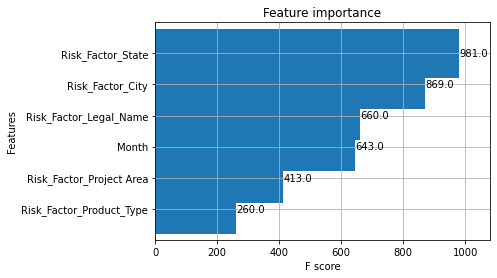

<Figure size 720x504 with 0 Axes>

In [68]:
###Using Tree Based Model to get top Feature
from xgboost import XGBClassifier
from xgboost import plot_importance

# fit model to training data
xgb_model = XGBClassifier(random_state = 0 )
xgb_model.fit(X, y)

print("Feature Importances : ", xgb_model.feature_importances_)
df = pd.DataFrame(columns = ['features','importance'])


# plot feature importance
plot_importance(xgb_model,height = 1.6)
plt.figure(figsize=(10, 7))
#plt.show()

In [69]:
### Tree Based Model
X.columns

Index(['Risk_Factor_FEI', 'Month', 'Quarter', 'Risk_Factor_Legal_Name',
       'Risk_Factor_City', 'Risk_Factor_State', 'Risk_Factor_Project Area',
       'Risk_Factor_Product_Type'],
      dtype='object')

In [70]:
train_df = pd.DataFrame(X,columns=col_name_feature)
train_df["Category OAI"] = y
train_df.columns

Index(['Risk_Factor_FEI', 'Month', 'Quarter', 'Risk_Factor_Legal_Name',
       'Risk_Factor_City', 'Risk_Factor_State', 'Risk_Factor_Project Area',
       'Risk_Factor_Product_Type', 'Category OAI'],
      dtype='object')

In [71]:
exp_clf102 = setup(data = train_df, target = 'Category OAI')

,Description,Value
0,session_id,577
1,Target,Category OAI
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(85029, 9)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [72]:
compare_models(sort='Recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9186,0.9715,0.8455,0.9042,0.8738,0.8138,0.8149,3.6220
et,Extra Trees Classifier,0.8944,0.9379,0.8428,0.8411,0.8419,0.7627,0.7627,2.8930
rf,Random Forest Classifier,0.8960,0.9558,0.8405,0.8466,0.8435,0.7657,0.7657,2.6820
lightgbm,Light Gradient Boosting Machine,0.9094,0.9666,0.8384,0.8840,0.8606,0.7936,0.7942,0.6460
knn,K Neighbors Classifier,0.8572,0.9197,0.8314,0.7621,0.7952,0.6859,0.6875,5.9480
gbc,Gradient Boosting Classifier,0.8713,0.9409,0.8138,0.8030,0.8083,0.7115,0.7115,3.6300
dt,Decision Tree Classifier,0.8791,0.8655,0.8042,0.8284,0.8161,0.7261,0.7263,0.1970
ada,Ada Boost Classifier,0.8412,0.9101,0.7322,0.7788,0.7546,0.6374,0.6382,1.1160
svm,SVM - Linear Kernel,0.8081,0.0000,0.5959,0.7782,0.6731,0.5411,0.5519,0.2070
lr,Logistic Regression,0.8010,0.8734,0.5579,0.7832,0.6516,0.5178,0.5324,1.8760


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=577, reg_alpha=0, ...)

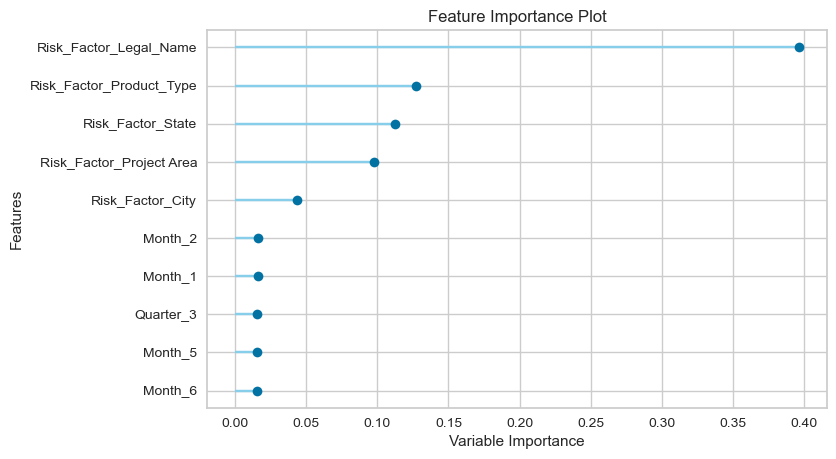

In [73]:
##Create Model
xgboost = create_model('xgboost', round = 2)
###Tune by Accuracy
xgboost_dt = tune_model(xgboost, optimize = 'Recall')
##Plot Parameters
plot_model(xgboost_dt, plot = 'parameter')
##Plot Features
plot_model(xgboost, plot='feature')

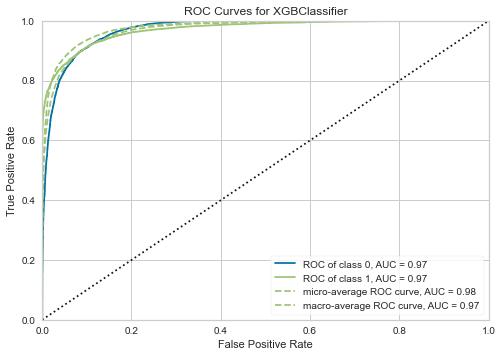

In [74]:
##Plot Model
plot_model(xgboost)

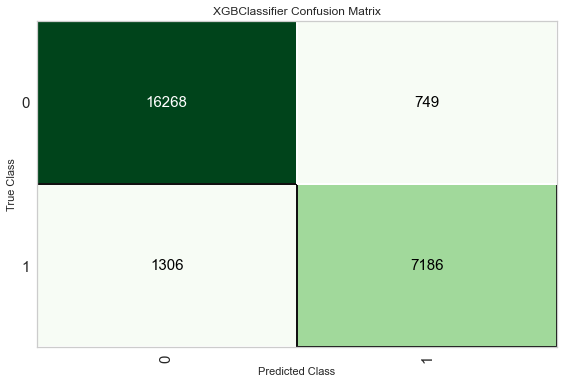

In [75]:
## Accuracy Calculation
plot_model(xgboost,'confusion_matrix')

In [76]:
final_rf = finalize_model(xgboost_dt)

In [77]:
unseen_predictions = predict_model(final_rf, data=test_df[['Risk_Factor_FEI',
       'Risk_Factor_Legal_Name', 'Risk_Factor_City', 'Risk_Factor_State','Quarter', 'Month',
       'Risk_Factor_Project Area', 'Risk_Factor_Product_Type']])
test_df["Xgboost"] = unseen_predictions['Label']
test_df["Xgboost_score"] = unseen_predictions['Score']

[[ 620 2596]
 [  18  196]]
              precision    recall  f1-score   support

           0       0.97      0.19      0.32      3216
           1       0.07      0.92      0.13       214

    accuracy                           0.24      3430
   macro avg       0.52      0.55      0.23      3430
weighted avg       0.92      0.24      0.31      3430



<AxesSubplot:>

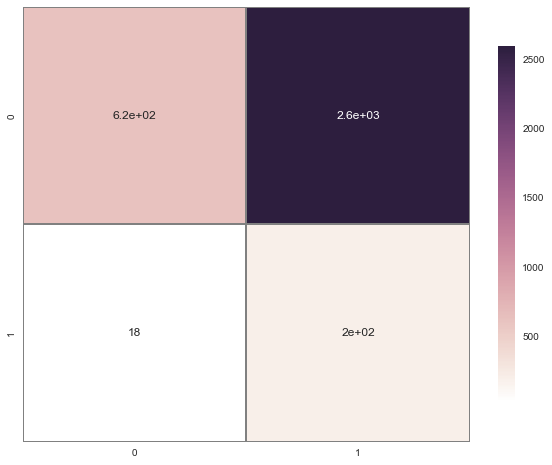

In [78]:
from sklearn import metrics
cmap = sn.cubehelix_palette(light=1, as_cmap=True)
df_tmp = test_df[['Category OAI','Xgboost']]
print(metrics.confusion_matrix(df_tmp['Category OAI'],df_tmp['Xgboost']))
print(metrics.classification_report(df_tmp['Category OAI'],df_tmp['Xgboost']))
df_temp = pd.DataFrame(metrics.confusion_matrix(df_tmp['Category OAI'],df_tmp['Xgboost']))
plt.figure(figsize=(10,8))
sn.heatmap(df_temp,annot=True,cmap=cmap, cbar_kws={"shrink": .82},
                  linewidths=0.1, linecolor='gray')

In [79]:
##Create Model lightgbm
lightgbm = create_model('rf', round = 2)
###Tune by Accuracy
lightgbm_dt = tune_model(lightgbm, optimize = 'Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.3337,0.5000,1.0000,0.3337,0.5004,0.0000,0.0000
1,0.3335,0.5000,1.0000,0.3335,0.5002,0.0000,0.0000
2,0.3335,0.5000,1.0000,0.3335,0.5002,0.0000,0.0000
3,0.3335,0.5000,1.0000,0.3335,0.5002,0.0000,0.0000
4,0.3335,0.5000,1.0000,0.3335,0.5002,0.0000,0.0000
5,0.3335,0.5000,1.0000,0.3335,0.5002,0.0000,0.0000
6,0.3335,0.5000,1.0000,0.3335,0.5002,0.0000,0.0000
7,0.3335,0.5000,1.0000,0.3335,0.5002,0.0000,0.0000
8,0.3335,0.5000,1.0000,0.3335,0.5002,0.0000,0.0000
9,0.3335,0.5000,1.0000,0.3335,0.5002,0.0000,0.0000


In [80]:
##Plot Parameters
plot_model(lightgbm_dt, plot = 'parameter')

,Parameters
bootstrap,False
ccp_alpha,0.0
class_weight,balanced_subsample
criterion,gini
max_depth,9
max_features,log2
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.3
min_impurity_split,None


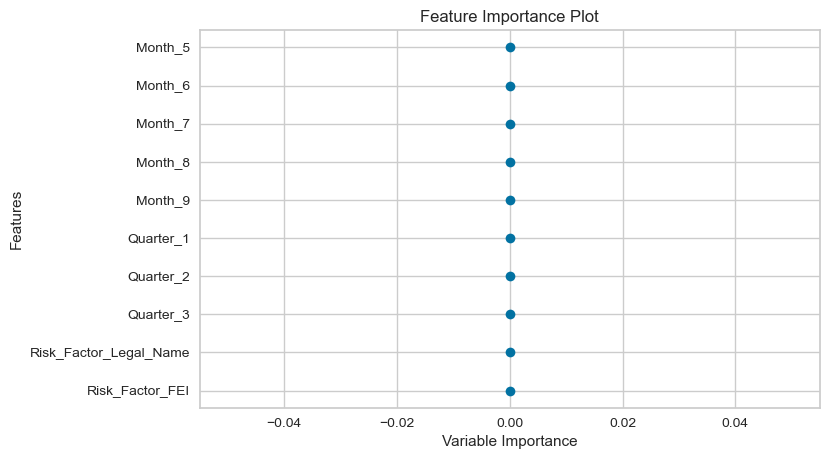

In [81]:
##Plot Features
plot_model(lightgbm_dt, plot='feature')

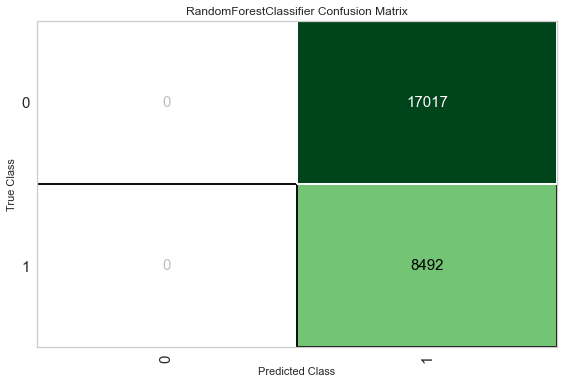

In [82]:
## Accuracy Calculation
plot_model(lightgbm_dt,'confusion_matrix')

In [83]:
final_rf = finalize_model(lightgbm_dt)
unseen_predictions = predict_model(final_rf, data=test_df[['Risk_Factor_FEI',
       'Risk_Factor_Legal_Name', 'Risk_Factor_City', 'Risk_Factor_State','Quarter', 'Month',
       'Risk_Factor_Project Area', 'Risk_Factor_Product_Type']])
test_df["lightgbm"] = unseen_predictions['Label']
test_df["lightgbm_score"] = unseen_predictions['Score']

[[3216    0]
 [ 214    0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3216
           1       0.00      0.00      0.00       214

    accuracy                           0.94      3430
   macro avg       0.47      0.50      0.48      3430
weighted avg       0.88      0.94      0.91      3430



<AxesSubplot:>

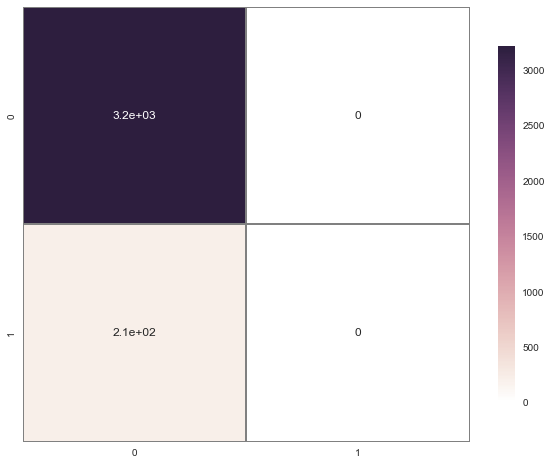

In [84]:
cmap = sn.cubehelix_palette(light=1, as_cmap=True)
df_tmp = test_df[['Category OAI','lightgbm']]
print(metrics.confusion_matrix(df_tmp['Category OAI'],df_tmp['lightgbm']))
print(metrics.classification_report(df_tmp['Category OAI'],df_tmp['lightgbm']))
df_temp = pd.DataFrame(metrics.confusion_matrix(df_tmp['Category OAI'],df_tmp['lightgbm']))
plt.figure(figsize=(10,8))
sn.heatmap(df_temp,annot=True,cmap=cmap, cbar_kws={"shrink": .82},
                  linewidths=0.1, linecolor='gray')

In [85]:
#Create Model lr
##Create Model lightgbm
lr = create_model('lr', round = 2)
###Tune by Accuracy
lr_dt = tune_model(lr, optimize = 'Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8125,0.8764,0.7356,0.7120,0.7236,0.5818,0.5820
1,0.8105,0.8731,0.7219,0.7133,0.7176,0.5750,0.5750
2,0.8194,0.8748,0.7380,0.7252,0.7316,0.5955,0.5956
3,0.8164,0.8758,0.7360,0.7197,0.7278,0.5892,0.5893
4,0.8083,0.8737,0.7244,0.7077,0.7160,0.5713,0.5714
5,0.8118,0.8750,0.7325,0.7117,0.7219,0.5798,0.5799
6,0.8086,0.8736,0.7330,0.7049,0.7187,0.5738,0.5740
7,0.8051,0.8641,0.7249,0.7009,0.7127,0.5653,0.5655
8,0.8112,0.8693,0.7310,0.7109,0.7208,0.5782,0.5783
9,0.8172,0.8816,0.7214,0.7280,0.7247,0.5879,0.5879


In [86]:
##Plot Parameters
plot_model(lr_dt, plot = 'parameter')

,Parameters
C,3.816
class_weight,balanced
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,1000
multi_class,auto
n_jobs,None
penalty,l2


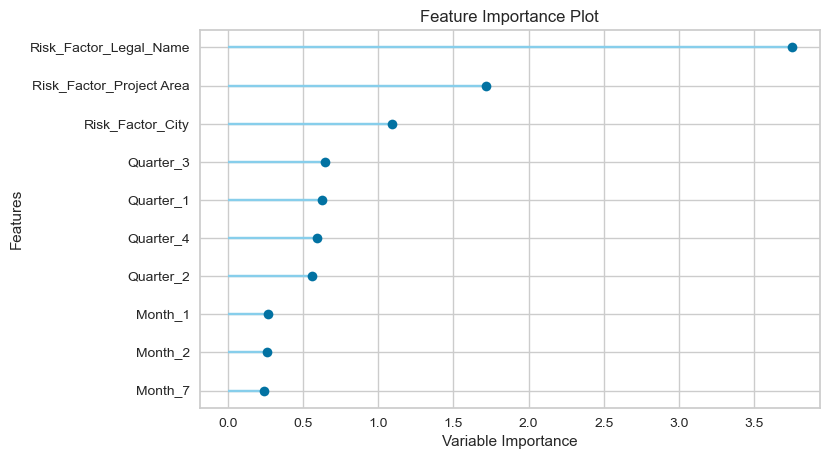

In [87]:
##Plot Features
plot_model(lr_dt, plot='feature')

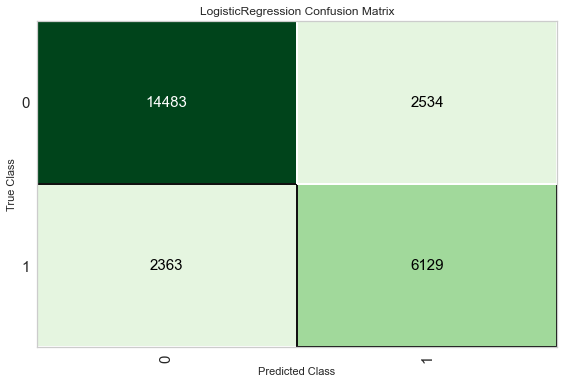

In [88]:
## Accuracy Calculation
plot_model(lr_dt,'confusion_matrix')

In [89]:
final_rf = finalize_model(lr_dt)
unseen_predictions = predict_model(final_rf, data=test_df[['Risk_Factor_FEI',
       'Risk_Factor_Legal_Name', 'Risk_Factor_City', 'Risk_Factor_State','Quarter', 'Month',
       'Risk_Factor_Project Area', 'Risk_Factor_Product_Type']])
test_df["lr"] = unseen_predictions['Label']
test_df["lr_score"] = unseen_predictions['Score']
test_df['Final Flag'] = test_df['lr'] + test_df['lightgbm'] +test_df['Xgboost']
test_df['Final Flag'] = np.where(test_df['Final Flag']>0,1,0)

[[2777  439]
 [ 160   54]]
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      3216
           1       0.11      0.25      0.15       214

    accuracy                           0.83      3430
   macro avg       0.53      0.56      0.53      3430
weighted avg       0.89      0.83      0.86      3430



<AxesSubplot:>

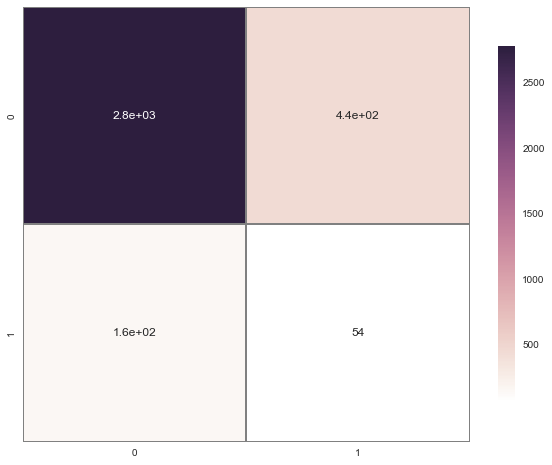

In [90]:
cmap = sn.cubehelix_palette(light=1, as_cmap=True)
df_tmp = test_df[['Category OAI','lr']]
print(metrics.confusion_matrix(df_tmp['Category OAI'],df_tmp['lr']))
print(metrics.classification_report(df_tmp['Category OAI'],df_tmp['lr']))
df_temp = pd.DataFrame(metrics.confusion_matrix(df_tmp['Category OAI'],df_tmp['lr']))
plt.figure(figsize=(10,8))
sn.heatmap(df_temp,annot=True,cmap=cmap, cbar_kws={"shrink": .82},
                  linewidths=0.1, linecolor='gray')

[[ 620 2596]
 [  18  196]]
              precision    recall  f1-score   support

           0       0.97      0.19      0.32      3216
           1       0.07      0.92      0.13       214

    accuracy                           0.24      3430
   macro avg       0.52      0.55      0.23      3430
weighted avg       0.92      0.24      0.31      3430



<AxesSubplot:>

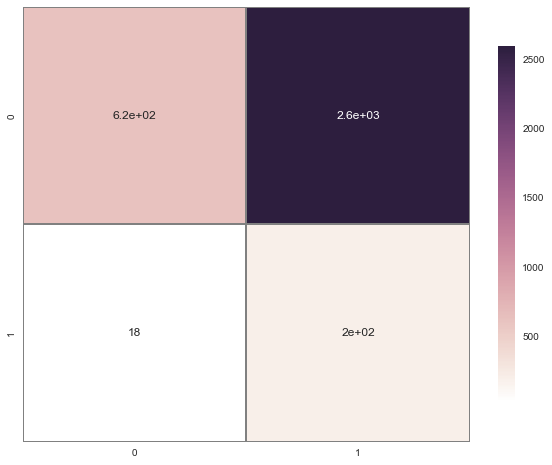

In [91]:
cmap = sn.cubehelix_palette(light=1, as_cmap=True)
df_tmp = test_df[['Category OAI','Final Flag']]
print(metrics.confusion_matrix(df_tmp['Category OAI'],df_tmp['Final Flag']))
print(metrics.classification_report(df_tmp['Category OAI'],df_tmp['Final Flag']))
df_temp = pd.DataFrame(metrics.confusion_matrix(df_tmp['Category OAI'],df_tmp['Final Flag']))
plt.figure(figsize=(10,8))
sn.heatmap(df_temp,annot=True,cmap=cmap, cbar_kws={"shrink": .82},
                  linewidths=0.1, linecolor='gray')

In [92]:
## Model Creation

In [93]:
##Xgb

In [94]:
master_data_main_imbalced_class_df['Inspection End Date'] = pd.to_datetime(master_data_main_imbalced_class_df['Inspection End Date'])
train_df = master_data_main_imbalced_class_df[master_data_main_imbalced_class_df['Inspection End Date']<'2021-07-01']
test_df = master_data_main_imbalced_class_df[master_data_main_imbalced_class_df['Inspection End Date']>'2021-06-30']

In [95]:
X_train = train_df[['Risk_Factor_FEI','Month', 'Quarter',
       'Risk_Factor_Legal_Name', 'Risk_Factor_City', 'Risk_Factor_State',
       'Risk_Factor_Project Area', 'Risk_Factor_Product_Type']]
y_train = train_df['Category OAI']
X_test = test_df[['Risk_Factor_FEI','Month', 'Quarter',
       'Risk_Factor_Legal_Name', 'Risk_Factor_City', 'Risk_Factor_State',
       'Risk_Factor_Project Area', 'Risk_Factor_Product_Type']]
y_test = test_df['Category OAI']
col_name_feature = X_train.columns
class_name = "Category OAI"

In [96]:
##Imbalance classification Mapping
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
counter = Counter(y_train)
print(counter)
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X, y = pipeline.fit_resample(X_train, y_train)
counter = Counter(y)
print(counter)

Counter({0: 56686, 1: 6429})
Counter({0: 56686, 1: 28343})


In [97]:
#counter = Counter(y_test)
#print(counter)
#X_test, y_test = pipeline.fit_resample(X_test, y_test)
#counter = Counter(y_test)
#print(counter)

<b>Threshold Analysis</b>

Best Threshold=0.050495, G-Mean=0.609


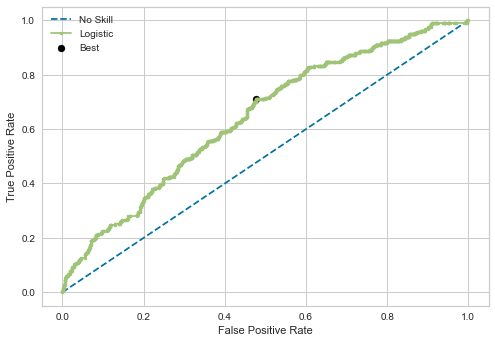

In [98]:
# roc curve for logistic regression model with optimal threshold
from numpy import sqrt
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot


# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
# predict probabilities
yhat = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [99]:
LM_model = LogisticRegression(C=1.0, class_weight={0: 0.5, 1: 99.5},
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=13, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False)
LM_model.fit(X_train,y_train)
print(LM_model.coef_, LM_model.intercept_)
print(X_train.columns)

[[ 0.          0.03187497 -0.09572455  4.54442763  1.81570192  0.19607892
   2.16726891 -0.22017025]] [-0.97458548]
Index(['Risk_Factor_FEI', 'Month', 'Quarter', 'Risk_Factor_Legal_Name',
       'Risk_Factor_City', 'Risk_Factor_State', 'Risk_Factor_Project Area',
       'Risk_Factor_Product_Type'],
      dtype='object')


<b>XGBoostClassifier</b>

In [100]:
xgb = XGBClassifier(learning_rate=0.3, n_estimators=10, objective='binary:logistic',
                    silent=True, nthread=4,base_score = 0.960,booster = 'gbtree',colsample_bylevel =1,colsample_bynode =1,colsample_bytree =0.9,enable_categorical =False,Gamma=0,gpu_id =-1,
                   max_bin =256,max_cat_to_onehot =4,max_delta_step=0,max_depth=1,max_leaves=0,min_child_weight=2,n_jobs =-1,num_parallel_tree=1,predictor="auto",random_state =613,reg_alpha=0.4,
                    reg_lambda=0.0001,sampling_method ="uniform",scale_pos_weight =18.0,subsample =0.5,tree_method ="auto",validate_parameters =1,verbosity=0)

In [101]:
#X.drop(columns='Category OAI',inplace=True)
xgb.fit(X,y)

XGBClassifier(Gamma=0, base_score=0.96, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=1, max_leaves=0, min_child_weight=2,
              missing=nan, monotone_constraints='()', n_estimators=10,
              n_jobs=-1, nthread=4, num_parallel_tree=1,
              objective='binary:logistic', predictor='auto', ...)

In [102]:
y = xgb.predict(X_test)

In [103]:
#test_df["xgb_prob"] = xgb.predict_proba(X_test)
test_df["xgb_predict"] = y

In [104]:
test_df["xgb_prob"] = pd.DataFrame(xgb.predict_proba(X_test),columns = ["0","1"])["1"]

In [105]:
test_df.head(1)

,FEI Number,Legal Name,City,State,Inspection ID,Inspection End Date,Month,Quarter,Category OAI,Project Area,Product Type,Risk_Factor_FEI,Risk_Factor_Legal_Name,Risk_Factor_City,Risk_Factor_State,Risk_Factor_Project Area,Risk_Factor_Product_Type,xgb_predict,xgb_prob
0,3007516078,"24/7 Seafood Distributor, Corp.",Miami,Florida,1173724,2022-07-06,7,3,0,Foodborne Biological Hazards,Food/Cosmetics,0.0,0.346574,0.918632,1.481191,0.88574,1.164926,1,0.960038


[[ 712 2504]
 [  19  195]]
              precision    recall  f1-score   support

           0       0.97      0.22      0.36      3216
           1       0.07      0.91      0.13       214

    accuracy                           0.26      3430
   macro avg       0.52      0.57      0.25      3430
weighted avg       0.92      0.26      0.35      3430



<AxesSubplot:>

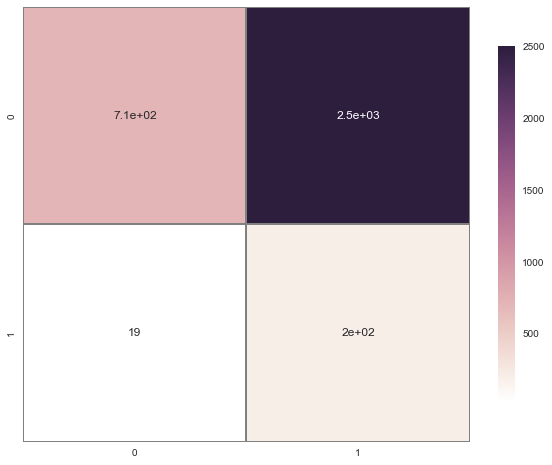

In [106]:
cmap = sn.cubehelix_palette(light=1, as_cmap=True)
df_tmp = test_df[['Category OAI','xgb_predict']]
print(metrics.confusion_matrix(df_tmp['Category OAI'],df_tmp['xgb_predict']))
print(metrics.classification_report(df_tmp['Category OAI'],df_tmp['xgb_predict']))
df_temp = pd.DataFrame(metrics.confusion_matrix(df_tmp['Category OAI'],df_tmp['xgb_predict']))
plt.figure(figsize=(10,8))
sn.heatmap(df_temp,annot=True,cmap=cmap, cbar_kws={"shrink": .82},
                  linewidths=0.1, linecolor='gray')

In [107]:
# write the file back
test_df.to_excel("Final_model_out.xlsx",sheet_name="Dataset",index=False)

In [108]:
temp_City.to_excel("City_risk_criteria.xlsx",sheet_name="Dataset",index=False)
temp_FEI.to_excel("FEI_risk_criteria.xlsx",sheet_name="Dataset",index=False)
temp_ln.to_excel("LIcense_Name_risk_criteria.xlsx",sheet_name="Dataset",index=False)
temp_Product_Type.to_excel("product_type_risk_criteria.xlsx",sheet_name="Dataset",index=False)
temp_Project_Area.to_excel("project_Area_risk_criteria.xlsx",sheet_name="Dataset",index=False)
temp_State.to_excel("state_risk_criteria.xlsx",sheet_name="Dataset",index=False)

In [109]:
master_data_df = master_data_df.merge(temp_City,how="left",left_on="City",right_on="City")
master_data_df = master_data_df.merge(temp_FEI,how="left",left_on="FEI Number",right_on="FEI Number")
master_data_df = master_data_df.merge(temp_ln,how="left",right_on="Legal Name",left_on="Legal Name")
master_data_df = master_data_df.merge(temp_Product_Type,how="left",right_on="Product Type",left_on="Product Type")
master_data_df = master_data_df.merge(temp_Project_Area,how="left",right_on="Project Area",left_on="Project Area")
master_data_df = master_data_df.merge(temp_State,how="left",right_on="State",left_on="State")

In [110]:
master_data_df['FEI Number']=master_data_df['FEI Number'].astype(str)
master_data_df.to_excel("Ranking_Criteria.xlsx",sheet_name="Master Data",index=False)

#### Balanced tree classifier

In [111]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import plot_confusion_matrix
from imblearn.ensemble import BalancedRandomForestClassifier
#Build SRF model
BRFC = BalancedRandomForestClassifier(n_estimators=150, random_state=2,max_depth=4,bootstrap=False)
#Create Stratified K-fold cross validation
#Train BRFC
BRFC.fit(X_train, y_train)
#BRFC prediction result
y_pred = BRFC.predict(X_test)

In [112]:
test_df["bc_prob"] = pd.DataFrame(BRFC.predict_proba(X_test),columns = ["0","1"])["1"]
test_df["bc_predict"] = np.where(test_df['bc_prob']>0.30,1,0)

[[1220 1996]
 [  53  161]]
              precision    recall  f1-score   support

           0       0.96      0.38      0.54      3216
           1       0.07      0.75      0.14       214

    accuracy                           0.40      3430
   macro avg       0.52      0.57      0.34      3430
weighted avg       0.90      0.40      0.52      3430



<AxesSubplot:>

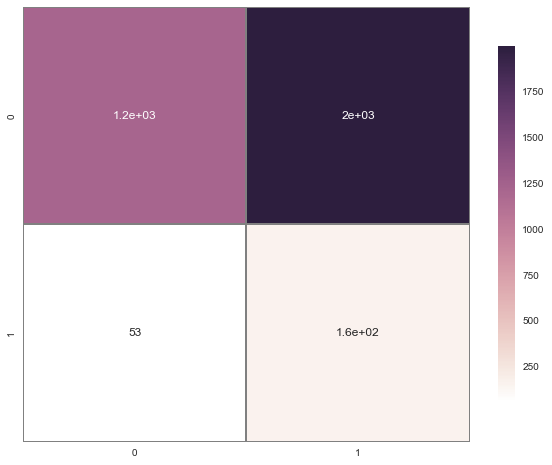

In [113]:
cmap = sn.cubehelix_palette(light=1, as_cmap=True)
df_tmp = test_df[['Category OAI','bc_predict']]
print(metrics.confusion_matrix(df_tmp['Category OAI'],df_tmp['bc_predict']))
print(metrics.classification_report(df_tmp['Category OAI'],df_tmp['bc_predict']))
df_temp = pd.DataFrame(metrics.confusion_matrix(df_tmp['Category OAI'],df_tmp['bc_predict']))
plt.figure(figsize=(10,8))
sn.heatmap(df_temp,annot=True,cmap=cmap, cbar_kws={"shrink": .82},
                  linewidths=0.1, linecolor='gray')

In [114]:
test_df.head(1)

,FEI Number,Legal Name,City,State,Inspection ID,Inspection End Date,Month,Quarter,Category OAI,Project Area,...,Risk_Factor_FEI,Risk_Factor_Legal_Name,Risk_Factor_City,Risk_Factor_State,Risk_Factor_Project Area,Risk_Factor_Product_Type,xgb_predict,xgb_prob,bc_prob,bc_predict
0,3007516078,"24/7 Seafood Distributor, Corp.",Miami,Florida,1173724,2022-07-06,7,3,0,Foodborne Biological Hazards,...,0.0,0.346574,0.918632,1.481191,0.88574,1.164926,1,0.960038,0.741144,1


[[1220 1996]
 [  53  161]]
              precision    recall  f1-score   support

           0       0.96      0.38      0.54      3216
           1       0.07      0.75      0.14       214

    accuracy                           0.40      3430
   macro avg       0.52      0.57      0.34      3430
weighted avg       0.90      0.40      0.52      3430



<AxesSubplot:>

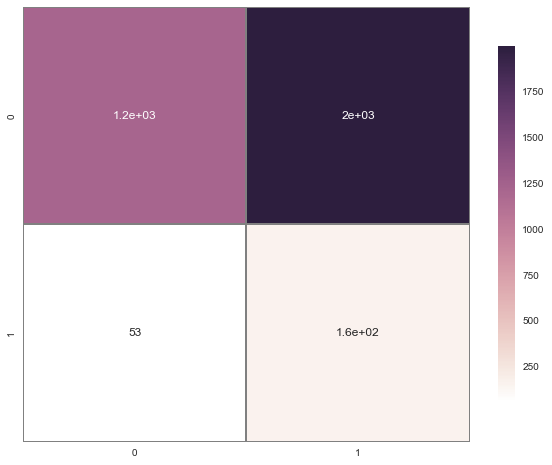

In [115]:
test_df["stack_pred"] = np.where((test_df['xgb_predict']==1)&(test_df['bc_predict']==1),1,0)
cmap = sn.cubehelix_palette(light=1, as_cmap=True)
df_tmp = test_df[['Category OAI','stack_pred']]
print(metrics.confusion_matrix(df_tmp['Category OAI'],df_tmp['stack_pred']))
print(metrics.classification_report(df_tmp['Category OAI'],df_tmp['stack_pred']))
df_temp = pd.DataFrame(metrics.confusion_matrix(df_tmp['Category OAI'],df_tmp['stack_pred']))
plt.figure(figsize=(10,8))
sn.heatmap(df_temp,annot=True,cmap=cmap, cbar_kws={"shrink": .82},
                  linewidths=0.1, linecolor='gray')

In [116]:
# write the file back
test_df.to_excel("Final_model_out.xlsx",sheet_name="Dataset",index=False)